# Running simulations with `SPaRTA`
Welcome! This is `SPaRTA` 🛡️ = SPeedy Lyman alpha Ray Tracing Algorithm. The code can be used to perform quickly MC simulation of the trajectories of absorbed Lyman alpha photons in the IGM, plotting them, and gather insights on their properties.

In this tutorial we show how to...
- Run `SPaRTA`.
- Set the inputs for the simulation.
- Read the outputs of the simulation.
- Plot useful quantities.

Let us import first the package of `SPaRTA` and other packages we need for this tutorial.

In [1]:
import sparta
import matplotlib.pyplot as plt

It is VERY recommended for `SPaRTA` users to have the `latex` package installed in the same python environment where `SPaRTA` is installed.
If you have latex installed then you may run the next cell, otherwise do not run it as it will raise errors and no plots in this tutorial will be shown!

In [2]:
plt.rcParams.update({"text.usetex": True, "font.family": "Times new roman"})

We also use the following color palette for this toturial (this combination is good for colorblindness).

In [3]:
import matplotlib as mpl

colors =  ['#377eb8', '#ff7f00', '#4daf4a',
           '#f781bf', '#a65628', '#984ea3',
           '#999999', '#e41a1c', '#dede00']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

## Setting inputs for the simulation

There are two input classes that are used in `SPaRTA`, these are `COSMO_PARAMS` and `SIM_PARAMS`. Let us go through the documentation of these classes.

In [4]:
print(sparta.COSMO_PARAMS.__doc__)


    Class for setting cosmological parameters.
    
    Parameters
    ----------
    This class contains the following cosmological parameters:
        - h: float
            Hubble constant (in 100 km/sec/Mpc).
        - Omega_m: float
            Current matter density parameter.
        - Omega_b: float
            Current baryon density parameter.
        - A_s: float
            Amplitude of primordial curvator fluctuations 
            in the pivot scale 0.05 Mpc^-1.
        - n_s: float
            Spectral tilt of primordial curvator fluctuations.
        - T: float
            Temperature of the IGM in the simulation, in Kelvin.
        - x_HI: float
            Fraction of neutral hydrogen in the simulation.
    


In [5]:
print(sparta.SIM_PARAMS.__doc__)


    Class for setting simulation parameters.
    
    Parameters
    ----------
    This class contains the following simulation parameters:
        - z_abs: float
            The redshift where the photon is absorbed.
        - N_photons: int
            Number of photons to simulate.
        - Delta_L: float
            "Grid" resolution in Mpc.
        Delta_z_initial, float
            The initial redshift difference with respect to the absorption point, normalized by 1+z_abs.
            It is (Delta z)/(1+z_abs), which equals to (Delta nu)/nu_alpha if there are no peculiar or thermal velocities.
        - x_stop: float
            Distance from absorption point to stop the simulation in units of the diffusion scale.
        - INCLUDE_VELOCITIES: bool
            If True, bulk peculiar velocities will be included in the simulation.
            Otherwise, assumes zero velocity throughout the simulation.
        - NO_CORRELATIONS: bool
            If True, the correlations in the v

We can inspect the defaults for these classes with the `_defaults_` attribute.

In [6]:
print(sparta.COSMO_PARAMS._defaults_)
print(sparta.SIM_PARAMS._defaults_)

{'h': 0.6766, 'Omega_m': 0.30964144154550644, 'Omega_b': 0.04897468161869667, 'A_s': np.float64(2.105209331337507e-09), 'n_s': 0.9665, 'T': 10000.0, 'x_HI': 1.0}
{'z_abs': 10.0, 'N_photons': 1000, 'Delta_L': 0.2, 'Delta_z_initial': 0.0002, 'x_stop': None, 'INCLUDE_VELOCITIES': True, 'NO_CORRELATIONS': False, 'USE_INTERPOLATION_TABLES': True, 'INCLUDE_TEMPERATURE': True, 'ANISOTROPIC_SCATTERING': True, 'INCLUDE_RECOIL': True, 'STRAIGHT_LINE': False, 'CROSS_SECTION': 'LORENTZIAN'}


Let us create instances of these classes! We can use any key from the `_defaults_` dictionaries when setting the inputs.

In [7]:
cosmo_params = sparta.COSMO_PARAMS(h=0.7, Omega_m=0.3, Omega_b=0.05)
sim_params = sparta.SIM_PARAMS(z_abs = 15, N_photons=10)

Alternatively, we can update existing instances.

In [8]:
cosmo_params = sparta.COSMO_PARAMS() # This gives the default
sim_params = sparta.SIM_PARAMS() # This gives the default
cosmo_params.update(h=0.7, Omega_m=0.3, Omega_b=0.05)
sim_params.update(z_abs = 15, N_photons=10)

Don't worry if you accidentally misspelled your keywords. You'll get an error if that happens!

In [9]:
try:
    cosmo_params = sparta.COSMO_PARAMS(H0 = 70)
except TypeError:
    print("TypeError: H0 is not a valid keyword input for <class 'sparta.inputs.COSMO_PARAMS'>.")

TypeError: H0 is not a valid keyword input for <class 'sparta.inputs.COSMO_PARAMS'>.


You can also read your inputs with the `print` method.

In [10]:
print("cosmo_params:\n------------")
cosmo_params.print()
print("\nsim_params:\n----------")
sim_params.print()

cosmo_params:
------------
  h = 0.7
  Omega_m = 0.3
  Omega_b = 0.05
  A_s = 2.105209331337507e-09
  n_s = 0.9665
  T = 10000.0
  x_HI = 1.0

sim_params:
----------
  z_abs = 15
  N_photons = 10
  Delta_L = 0.2
  Delta_z_initial = 0.0002
  x_stop = None
  INCLUDE_VELOCITIES = True
  NO_CORRELATIONS = False
  USE_INTERPOLATION_TABLES = True
  INCLUDE_TEMPERATURE = True
  ANISOTROPIC_SCATTERING = True
  INCLUDE_RECOIL = True
  STRAIGHT_LINE = False
  CROSS_SECTION = LORENTZIAN


## Run SPaRTA

Given instances of `COSMO_PARAMS` and `SIM_PARAMS`, we can run a simulation with the `run_SPaRTA` method. Note that an optional `random_seed` argument can be provided, this sets the random seed for the first photon in the simulation (for the next simulated photon, the random seed is incremented by 1, given the random seed of the previous photon). If `random_seed` is not provided, it is set to be `int(sim_params.z_abs)`.

In [11]:
all_photons_data_1 = sparta.run_SPaRTA(cosmo_params=cosmo_params, sim_params=sim_params, random_seed=1234)

100%|██████████| 10/10 [00:00<00:00, 16.93photons/s]


It is possible not to provide `cosmo_params` and `sim_params` in `run_SPaRTA`. In that case the default instances of `COSMO_PARAMS` and `SIM_PARAMS` will be considered.
It is also possible, and probably even easier, to specify the keywords directly in `run_SPaRTA`. This will overwrite the parameters in `cosmo_params` and `sim_params`, whether they are specified or not.

In [12]:
all_photons_data_2 = sparta.run_SPaRTA(h=0.7, Omega_m=0.3, Omega_b=0.05, z_abs = 15, N_photons=10, random_seed=1234)

100%|██████████| 10/10 [00:00<00:00, 16.54photons/s]


Note that `all_photons_data_1` and `all_photons_data_2` contain the exact same information!

Again, if you try to `run_SPaRTA` with an invalid argument, the code will let you know.

In [13]:
try:
    sparta.run_SPaRTA(H0=70)
except KeyError:
    print("KeyError: H0 is not a valid keyword argument in SPaRTA.")

KeyError: H0 is not a valid keyword argument in SPaRTA.


## Reading outputs from the simulation

Each output object of `SPaRTA` contains the input objects.

In [14]:
print("cosmo_params:\n------------")
all_photons_data_2.cosmo_params.print()
print("\nsim_params:\n----------")
all_photons_data_2.sim_params.print()

cosmo_params:
------------
  h = 0.7
  Omega_m = 0.3
  Omega_b = 0.05
  A_s = 2.105209331337507e-09
  n_s = 0.9665
  T = 10000.0
  x_HI = 1.0

sim_params:
----------
  z_abs = 15
  N_photons = 10
  Delta_L = 0.2
  Delta_z_initial = 0.0002
  x_stop = 17.945112564285523
  INCLUDE_VELOCITIES = True
  NO_CORRELATIONS = False
  USE_INTERPOLATION_TABLES = True
  INCLUDE_TEMPERATURE = True
  ANISOTROPIC_SCATTERING = True
  INCLUDE_RECOIL = True
  STRAIGHT_LINE = False
  CROSS_SECTION = LORENTZIAN


Specifically, `all_photons_data_2` is an object of type `ALL_PHOTONS_DATA`. That means it contains a list called `photons_data`. The length of this list is the same as `sim_params.N_photons`, while each item in that list is an instance of type `PHOTON_POINTS_DATA`.

In [15]:
photons_data = all_photons_data_2.photons_data
photon_data = photons_data[0]
print(f"Type of all_photons_data_2 is {type(all_photons_data_2)}.")
print(f"Length of photons_data is {len(photons_data)}, which is the same as N_photons={all_photons_data_2.sim_params.N_photons}.")
print(f"Type of photon_data is {type(photon_data)}.")

Type of all_photons_data_2 is <class 'sparta.outputs.ALL_PHOTONS_DATA'>.
Length of photons_data is 10, which is the same as N_photons=10.
Type of photon_data is <class 'sparta.outputs.PHOTON_POINTS_DATA'>.


`photon_data` contains the information of the first photon in the simulation. Let us inspect what it contains.

In [16]:
points_data = photon_data.points_data
point_data = points_data[1]
print(f"Random seed of photon_data is {photon_data.random_seed}.")
print(f"Length of points_data is {len(points_data)}.")
print(f"Type of point_data is {type(point_data)}.")

Random seed of photon_data is 1234.
Length of points_data is 22.
Type of point_data is <class 'sparta.outputs.COSMO_POINT_DATA'>.


We see from here that the first photon in the simulation, with a random seed of 1234, contains a list with 22 items. Each item in that list is an instance of class `COSMO_POINT_DATA`. These 22 items thus contain the information of 22 scattering points along the trajectory of the first photon in the simulation. The number of scattering points varies from photon to photon in the simulation, and is controlled by the parameters of the simulation (for example, decreasing `Delta_z_initial` yields more scattering points, as the simulation begins closer to the line center).

In our example, `point_data` is the second scattering point in the simulation, before absorption, since the simulation in `SPaRTA` goes **backwards** in time. Let us see what this point contains.

In [17]:
print(f"Redshift of the point: {point_data.redshift}.")
print(f"Apparent frequency of the photon at the point (w.r.t the gas rest frame), normalized by Lya frequency: {point_data.apparent_frequency}.")
print(f"Position of the point, w.r.t the absorption point: {point_data.position_vector} Mpc.")
print(f"Peculiar velocity of the gas, w.r.t a comoving frame (in units of speed of light): {point_data.velocity_vector}.")

Redshift of the point: 15.0032.
Apparent frequency of the photon at the point (w.r.t the gas rest frame), normalized by Lya frequency: 1.000184643545768.
Position of the point, w.r.t the absorption point: [-0.01759271  0.02165951  0.0209863 ] Mpc.
Peculiar velocity of the gas, w.r.t a comoving frame (in units of speed of light): [ 0.0001632  -0.00041717  0.00049794].


To summarize, each point in the output of `SPaRTA` contains the information of:
1. Redshift.
2. Position.
3. Frequency.
4. Velocity.

## Plot output

The output of `SPaRTA` can contain a lot of information. Luckily for you, there are useful automatic routines to display that data.

Let us begin by running two `SPaRTA` simulations. In the first simulation, we simulate 5 photons, and also set a finer "grid" resolution to see better the scatters on small scales. In the second simulation, we simulate only one photon, which is forced to travel in a straight-line. We also disable any effects that would modify the apparent frequency of the straight-line traveling photon (besides redshift due to expansion of the Universe).

In [18]:
all_photons_data_ms = sparta.run_SPaRTA(
    random_seed = 1,
    Delta_L = 0.1,
    N_photons = 5,
)

all_photons_data_sl = sparta.run_SPaRTA(
    STRAIGHT_LINE = True,
    INCLUDE_VELOCITIES = False,
    INCLUDE_RECOIL = False,
    N_photons = 1,
)

100%|██████████| 1/1 [00:00<00:00, 43.83photons/s]


We can plot the trajectory of the photons with `plot_photon_trajectory`. This function has an argument called `scale` which controls the scale of the 3D plot. Below we plot the trajectories on three different scales. In all panels, the straight-line photon is represented by the black curve.

NOTE: All plotting functions in `SPaRTA` accept the same keyword arguments as for `matplotlib.pyplot.plot`.

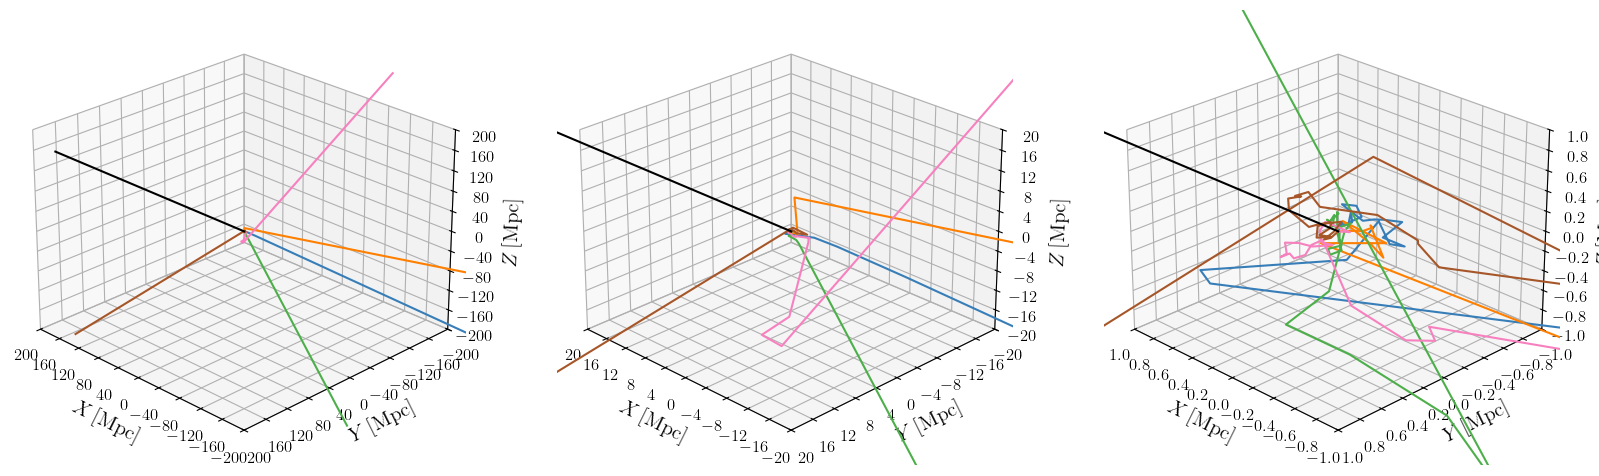

In [19]:
scales = [200,20,1]
fig = plt.figure(figsize=(20,40))
for scale_ind, scale in enumerate(scales):
    ax =  fig.add_subplot(1,3,scale_ind+1,projection='3d')
    for n in range(5):
        all_photons_data_ms.plot_photon_trajectory(n,color=colors[n],ax=ax,scale=scale)
    all_photons_data_sl.plot_photon_trajectory(0,color='k',ax=ax,scale=scale)
    ax.view_init(elev=25., azim=135.)

Clearly, on large scales the photons appear to travel in straight-lines, while on smaller scales they tend to scatter more, as their apparent frequency reaches closer to the line center. This feature can also be seen by plotting the distance (from the absorption point) and the apparent frequency shift (w.r.t the line center) as functions of redshift. This is done with the methods `plot_distance` and `plot_apparent_frequency`.

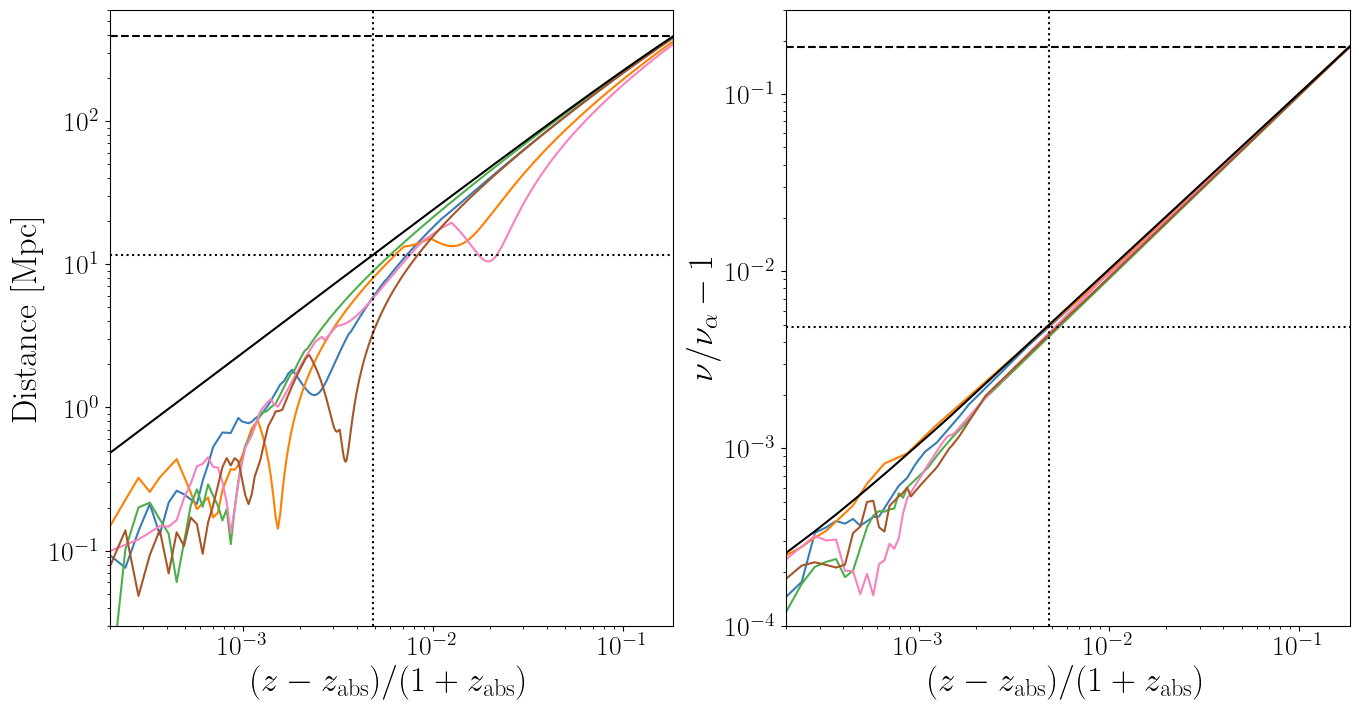

In [20]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
for n in range(5):
    all_photons_data_ms.plot_distance(n,color=colors[n],ax=ax[0])
    all_photons_data_ms.plot_apparent_frequency(n,color=colors[n],ax=ax[1])
all_photons_data_sl.plot_distance(0,color='k',ax=ax[0])
all_photons_data_sl.plot_apparent_frequency(0,color='k',ax=ax[1])
ax[0].set_ylim([0.03,600])
ax[1].set_ylim([1e-4,0.3])
# Add a Lymann beta horizontal dashed line (nu_stop in this example is Lyman beta)
max_redshift = (1.+all_photons_data_sl.z_abs)*all_photons_data_sl.sim_params.nu_stop-1.
max_distance = all_photons_data_sl.cosmo_params.R_SL(all_photons_data_sl.z_abs,max_redshift)
ax[0].axhline(y=max_distance,ls='--',color='k')
ax[1].axhline(y=all_photons_data_sl.sim_params.nu_stop-1.,ls='--',color='k')
# Add dotted lines at the diffusion scale
ax[0].axhline(y=all_photons_data_sl.cosmo_params.r_star(all_photons_data_sl.z_abs),ls=':',color='k')
ax[0].axvline(x=all_photons_data_sl.cosmo_params.Delta_nu_star(all_photons_data_sl.z_abs),ls=':',color='k')
ax[1].axhline(y=all_photons_data_sl.cosmo_params.Delta_nu_star(all_photons_data_sl.z_abs),ls=':',color='k')
ax[1].axvline(x=all_photons_data_sl.cosmo_params.Delta_nu_star(all_photons_data_sl.z_abs),ls=':',color='k');

Notice that the rate of scattering changes significantly before and after the dotted lines. The dotted lines mark the comoving diffusion scale, which can analytically be estimated to be
\begin{equation*}
R_{*}\left(z_\mathrm{abs}\right)=\frac{3c^{4}A_{\alpha}^{2}n_{\mathrm{H0}}}{32\pi^{3}\nu_{\alpha}^{4}H_{0}^{2}\Omega_{m}}x_{\mathrm{HI}}\left(1+z_{\mathrm{abs}}\right)\simeq10.4\,x_{\mathrm{HI}}\left(\frac{\Omega_{b}h^{2}}{0.0223}\right)\left(\frac{\Omega_{m}h^{2}}{0.143}\right)^{-1}\left(\frac{1-Y_{\mathrm{He}}}{0.755}\right)\left(\frac{1+z_{\mathrm{abs}}}{10}\right)\,\mathrm{Mpc}
\end{equation*}
and
\begin{equation*}
\frac{\Delta\nu_{*}}{\nu_{\alpha}}=\frac{\Delta z_{*}}{1+z_{\mathrm{abs}}}=\frac{3c^{3}A_{\alpha}^{2}n_{\mathrm{H0}}}{32\pi^{3}\nu_{\alpha}^{4}H_{0}\Omega_{m}^{1/2}}x_{\mathrm{HI}}\left(1+z_{\mathrm{abs}}\right)^{3/2}\simeq 4.2\times10^{-3}x_{\mathrm{HI}}\left(\frac{\Omega_{b}h^{2}}{0.0223}\right)\left(\frac{\Omega_{m}h^{2}}{0.143}\right)^{-1/2}\left(\frac{1-Y_{\mathrm{He}}}{0.755}\right)\left(\frac{1+z_{\mathrm{abs}}}{10}\right)^{3/2}
\end{equation*}